In [68]:
from matplotlib import pyplot as plt
%matplotlib inline
from importlib import reload
from utils import *
import test
import acd

In [69]:
from jupyterthemes import jtplot
# jtplot.style()  # development
jtplot.reset()  # production

In [3]:
w2v = load_w2v()

Loading real w2v...
Done


In [4]:
reload(acd)
acd_ = acd.ACD(w2v)
acd_.train_acd()

Loading tokenizer...
-- ACD:
Loading dataset...
Training...
Evaluating...
F1: 0.7576974564926373


In [79]:
import polarity
reload(polarity)
pd_ = polarity.PD(w2v, acd_)
datasets = pd_.load_grid_datasets()

-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/1708
get_pd_ds progress: 100/1708
get_pd_ds progress: 200/1708
get_pd_ds progress: 300/1708
get_pd_ds progress: 400/1708
get_pd_ds progress: 500/1708
get_pd_ds progress: 600/1708
get_pd_ds progress: 700/1708
get_pd_ds progress: 800/1708
get_pd_ds progress: 900/1708
get_pd_ds progress: 1000/1708
get_pd_ds progress: 1100/1708
get_pd_ds progress: 1200/1708
get_pd_ds progress: 1300/1708
get_pd_ds progress: 1400/1708
get_pd_ds progress: 1500/1708
get_pd_ds progress: 1600/1708
get_pd_ds progress: 1700/1708
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/587
get_pd_ds progress: 100/587
get_pd_ds progress: 200/587
get_pd_ds progress: 300/587
get_pd_ds progress: 400/587
get_pd_ds progress: 500/587
-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
g

Running SVM (baseline, w2v)...
           C  Mean Accuracy
0   0.010000       0.672742
1   0.062105       0.675119
2   0.114211       0.747623
3   0.166316       0.778526
4   0.218421       0.786450
5   0.270526       0.791997
6   0.322632       0.797544
7   0.374737       0.799525
8   0.426842       0.802298
9   0.478947       0.805468
10  0.531053       0.802694
11  0.583158       0.802298
12  0.635263       0.802298
13  0.687368       0.801506
14  0.739474       0.801506
15  0.791579       0.800713
16  0.843684       0.799921
17  0.895789       0.799128
18  0.947895       0.800317
19  1.000000       0.801109
Running SVM (append, w2v)...
           C  Mean Accuracy
0   0.010000       0.690967
1   0.062105       0.745642
2   0.114211       0.767036
3   0.166316       0.784865
4   0.218421       0.792789
5   0.270526       0.797940
6   0.322632       0.803090
7   0.374737       0.803883
8   0.426842       0.804675
9   0.478947       0.805864
10  0.531053       0.806260
11  0.583158    

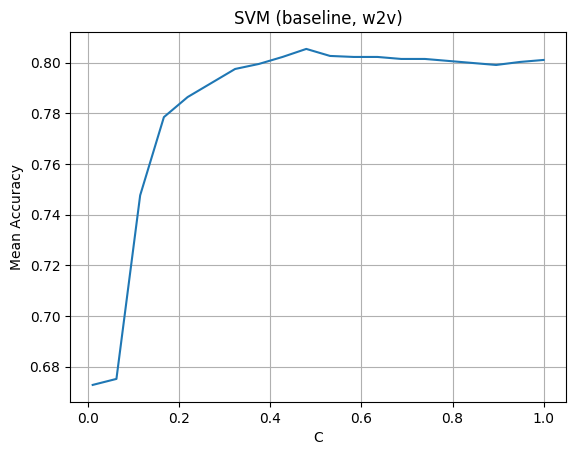

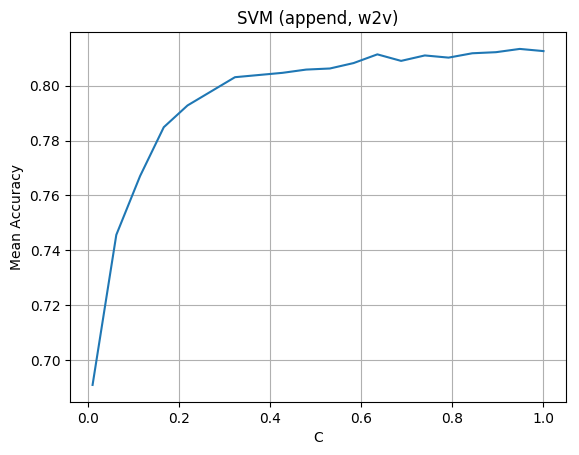

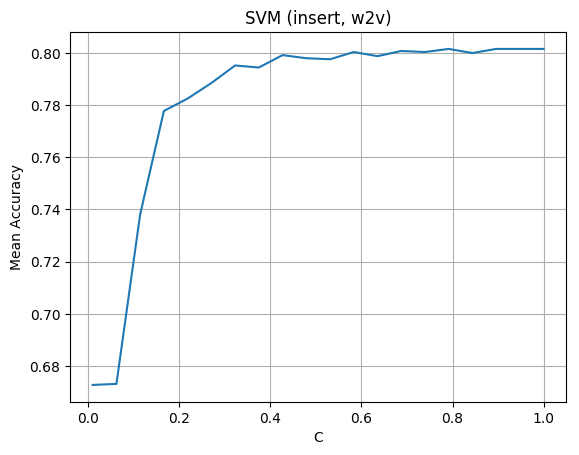

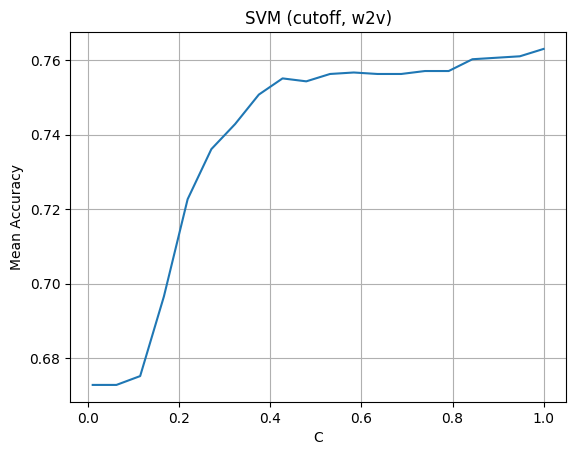

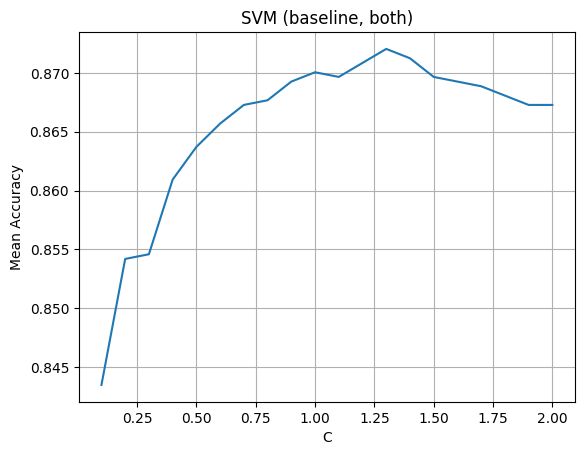

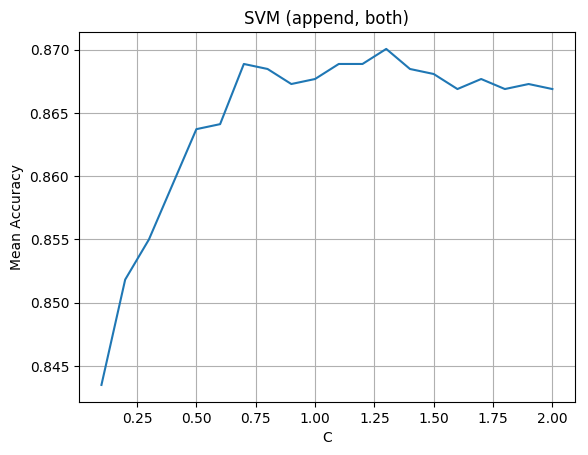

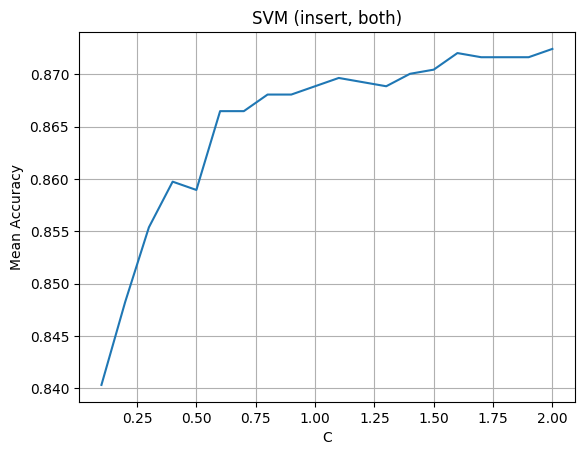

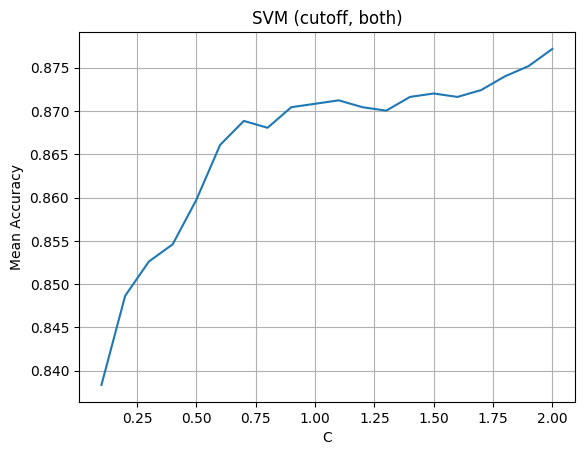

In [80]:
import polarity
reload(polarity)
pd_ = polarity.PD(w2v, acd_)
pd_.grid_search_pd(datasets, n_jobs=4)

In [81]:
import polarity
reload(polarity)
pd_ = polarity.PD(w2v, acd_)
data = pd_.prepare_data(pd_.get_pd_features_map_tree_distance, False)

-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/1708
get_pd_ds progress: 100/1708
get_pd_ds progress: 200/1708
get_pd_ds progress: 300/1708
get_pd_ds progress: 400/1708
get_pd_ds progress: 500/1708
get_pd_ds progress: 600/1708
get_pd_ds progress: 700/1708
get_pd_ds progress: 800/1708
get_pd_ds progress: 900/1708
get_pd_ds progress: 1000/1708
get_pd_ds progress: 1100/1708
get_pd_ds progress: 1200/1708
get_pd_ds progress: 1300/1708
get_pd_ds progress: 1400/1708
get_pd_ds progress: 1500/1708
get_pd_ds progress: 1600/1708
get_pd_ds progress: 1700/1708
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/587
get_pd_ds progress: 100/587
get_pd_ds progress: 200/587
get_pd_ds progress: 300/587
get_pd_ds progress: 400/587
get_pd_ds progress: 500/587


In [105]:
import polarity
reload(polarity)
pd_ = polarity.PD(w2v, acd_)
pd_.train_pd_keras_both_svm(data=data)

-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/1708
get_pd_ds progress: 100/1708
get_pd_ds progress: 200/1708
get_pd_ds progress: 300/1708
get_pd_ds progress: 400/1708
get_pd_ds progress: 500/1708
get_pd_ds progress: 600/1708
get_pd_ds progress: 700/1708
get_pd_ds progress: 800/1708
get_pd_ds progress: 900/1708
get_pd_ds progress: 1000/1708
get_pd_ds progress: 1100/1708
get_pd_ds progress: 1200/1708
get_pd_ds progress: 1300/1708
get_pd_ds progress: 1400/1708
get_pd_ds progress: 1500/1708
get_pd_ds progress: 1600/1708
get_pd_ds progress: 1700/1708
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/587
get_pd_ds progress: 100/587
get_pd_ds progress: 200/587
get_pd_ds progress: 300/587
get_pd_ds progress: 400/587
get_pd_ds progress: 500/587
Train on 2524 samples, validate on 842 samples
Epoch 1/19
2524/2524 [==============================] - 6s - loss: 0.7737 - acc: 0.6

In [58]:
import polarity
reload(polarity)
pd_ = polarity.PD(w2v, acd_)
avg_data = pd_.prepare_data(pd_.get_pd_features_map_tree_distance, True)
x_train, x_test, y_train, y_test = pd_.resplit(*avg_data)

-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/1708
get_pd_ds progress: 100/1708
get_pd_ds progress: 200/1708
get_pd_ds progress: 300/1708
get_pd_ds progress: 400/1708
get_pd_ds progress: 500/1708
get_pd_ds progress: 600/1708
get_pd_ds progress: 700/1708
get_pd_ds progress: 800/1708
get_pd_ds progress: 900/1708
get_pd_ds progress: 1000/1708
get_pd_ds progress: 1100/1708
get_pd_ds progress: 1200/1708
get_pd_ds progress: 1300/1708
get_pd_ds progress: 1400/1708
get_pd_ds progress: 1500/1708
get_pd_ds progress: 1600/1708
get_pd_ds progress: 1700/1708
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/587
get_pd_ds progress: 100/587
get_pd_ds progress: 200/587
get_pd_ds progress: 300/587
get_pd_ds progress: 400/587
get_pd_ds progress: 500/587


In [64]:
clf = SVC(kernel='linear', C=4, random_state=1)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.80997624703087889

In [100]:
predictions1 = [
    [0.1, 0.2, 0.3],
    [0.1, 0.2, 0.3],
]

predictions2 = [
    [0.3, 0.2, 0.1],
    [0.1, 0.2, 0.3],
]

predictions = np.average([predictions1, predictions2], axis=0)
predictions = np.argmax(predictions, axis=1)
predictions

array([0, 2], dtype=int64)